In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CPU = False
ALLOW_MPS = False

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json",merges_file = "../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"

models = model_loader.preload_model(model_file,DEVICE)
prompt = "a robot holding a flower"
uncond_prompt = ""
do_cfg = True
cfg_scale = 10

##Image to Image
input_image = None
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.9
sampler = "ddpm"
num_inference_steps = 50
seed = 42


output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    n_inference_steps= num_inference_steps,
    seed = seed,
    models=models,
    device = DEVICE,
    idle_device = "cpu",
    tokenizer = tokenizer
)

/Users/ambroseling/miniforge3/envs/sd_from_scratch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [10:06<00:00, 12.12s/it]


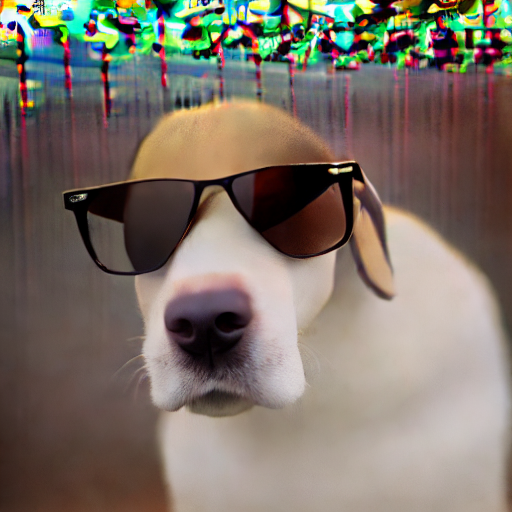

In [2]:
Image.fromarray(output_image)